# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s').dt.round('1d')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
840,2021-08-05,2021-08-05,得唔得?,dak1 m4 dak1,2,0,100,None,2021-08-09
835,2021-08-04,2021-08-05,情侶,cing4 leoi5,0,2,90,None,2021-08-09
832,2021-08-04,2021-08-05,金色,gam1 sik1,2,0,100,None,2021-08-09
833,2021-08-04,2021-08-05,出去,ceot1 heoi3,1,1,90,None,2021-08-07
834,2021-08-04,2021-08-05,金髮,gam1 faat3,2,0,100,None,2021-08-09
839,2021-08-04,2021-08-05,約會,joek3 wui6,0,1,90,None,2021-08-09
836,2021-08-04,2021-08-05,仲係,zung6 hai6,1,1,90,None,2021-08-09
838,2021-08-04,2021-08-05,投訴,tau4 sou3,0,3,90,None,2021-08-09
837,2021-08-04,2021-08-05,差,caa1,1,0,100,None,2021-08-09
829,2021-07-14,2021-08-02,氹返,tam5 faan2,0,1,90,None,2021-08-02


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
17,2020-01-12,2021-07-24,咪,mai5,13,7,52,high,2021-08-11
530,2020-10-28,2021-07-24,一啲啲,jat1 di1 di1,2,2,80,high,2021-08-11
546,2020-11-18,2021-07-24,介紹,gaai3 siu6,1,8,80,veryhigh,2021-08-11
738,2021-04-01,2021-07-24,唔理,m4 lei5,5,7,60,veryhigh,2021-08-11
554,2020-11-18,2021-07-24,自己,zi6 gei2,4,15,60,veryhigh,2021-08-11
561,2020-11-26,2021-07-24,一切,jat1 cai3,2,3,80,veryhigh,2021-08-11
545,2020-11-05,2021-07-24,工程,gung1 cing4,1,7,80,veryhigh,2021-08-11
588,2020-12-24,2021-07-24,不如,bat1 jyu4,4,8,60,high,2021-08-11
535,2020-10-29,2021-07-24,嵗,seoi3,4,4,70,veryhigh,2021-08-11
587,2020-12-24,2021-07-24,等一等,dang2 jat1 dang2,6,7,72,high,2021-08-11


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
607,2021-01-07,2021-07-24,身體健康,san1 tai2 gin6 hong1,1,2,80,None,2021-05-28
362,2020-06-10,2021-07-24,刺激,ci3 gik1,3,11,80,None,2021-04-11
529,2020-10-28,2021-08-04,老婆,lou5 po4,1,2,90,None,2021-08-07
80,2020-03-25,2021-07-24,識,sik1,21,13,50,None,2021-03-24
111,2020-03-28,2021-07-24,顏色,ngaan4 sik1,12,13,50,None,2021-06-03
597,2021-01-07,2021-07-24,更加,gang3 gaa1,1,2,80,None,2021-05-28
34,2020-03-05,2021-07-24,八,baat3,23,12,62,None,2021-01-29
323,2020-06-01,2021-07-24,會計,wui6 gai3,9,13,50,None,2021-03-25
540,2020-11-04,2021-07-24,一齊,jat1 cai4,0,3,90,veryhigh,2021-08-09
88,2020-03-25,2021-07-24,拜拜,baai1 baai3,16,5,80,None,2020-12-01


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.jyutping.str.contains('')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
840,2021-08-05,2021-08-05,得唔得?,dak1 m4 dak1,2,0,100,None,2021-08-09
839,2021-08-04,2021-08-05,約會,joek3 wui6,0,1,90,None,2021-08-09
838,2021-08-04,2021-08-05,投訴,tau4 sou3,0,3,90,None,2021-08-09
837,2021-08-04,2021-08-05,差,caa1,1,0,100,None,2021-08-09
836,2021-08-04,2021-08-05,仲係,zung6 hai6,1,1,90,None,2021-08-09
...,...,...,...,...,...,...,...,...,...
3,2020-01-09,2021-07-24,嘅,ge3,28,17,74,None,2021-03-25
2,2020-01-09,2021-07-24,同,tung4,17,9,50,None,2021-03-25
1,2020-01-09,2021-07-24,六,luk6,38,18,50,veryhigh,2021-07-31
4,2020-01-09,2021-07-24,一,jat1,29,3,124,None,2021-04-14


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
DatetimeIndex(['2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
               '2021-08-09', '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', freq='D')


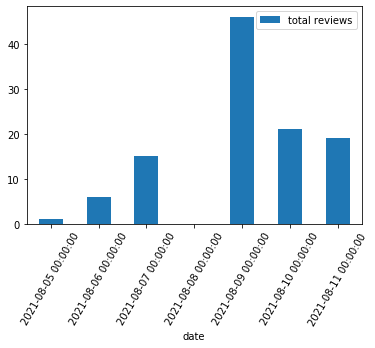

In [6]:
import datetime



today = pd.to_datetime("today").round('1d')
print(type(today))
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
print(week_range)
date2count ={"date":week_range,"total reviews":[0]*7}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    if card_stamp in week_range:
        if card_stamp in date2count["date"]:
            date2count["total reviews"][list(week_range).index(card_stamp)] += 1
            

datesframe = pd.DataFrame(date2count)
datesframe.plot.bar(x='date', y='total reviews', rot=60)
